In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Project/

/content/drive/MyDrive/Project


In [11]:
%cd 3D_UNet_menisc_seg/

/content/drive/MyDrive/Project/3D_UNet_menisc_seg


In [12]:
!ls data/train/*.im | wc -l

120


In [13]:
fname_img = 'data/valid/valid_001_V00.im'
fname_seg = 'data/valid/valid_001_V00.seg'

In [14]:
with h5py.File(fname_img,'r') as hf:
    img = np.array(hf['data'])

img.shape

(384, 384, 160)

In [15]:
img.flatten().shape

(23592960,)

In [16]:
max(img.flatten())

0.017212177

**Plot some successive slices from the morphological image**

In [17]:
#with h5py.File(all_paths[5][:-4]+'.im','r') as hf:
#    img = np.array(hf['data'])

num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,img.shape[-1],img.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Plot a mean of all six segmentations provided in this dataset**

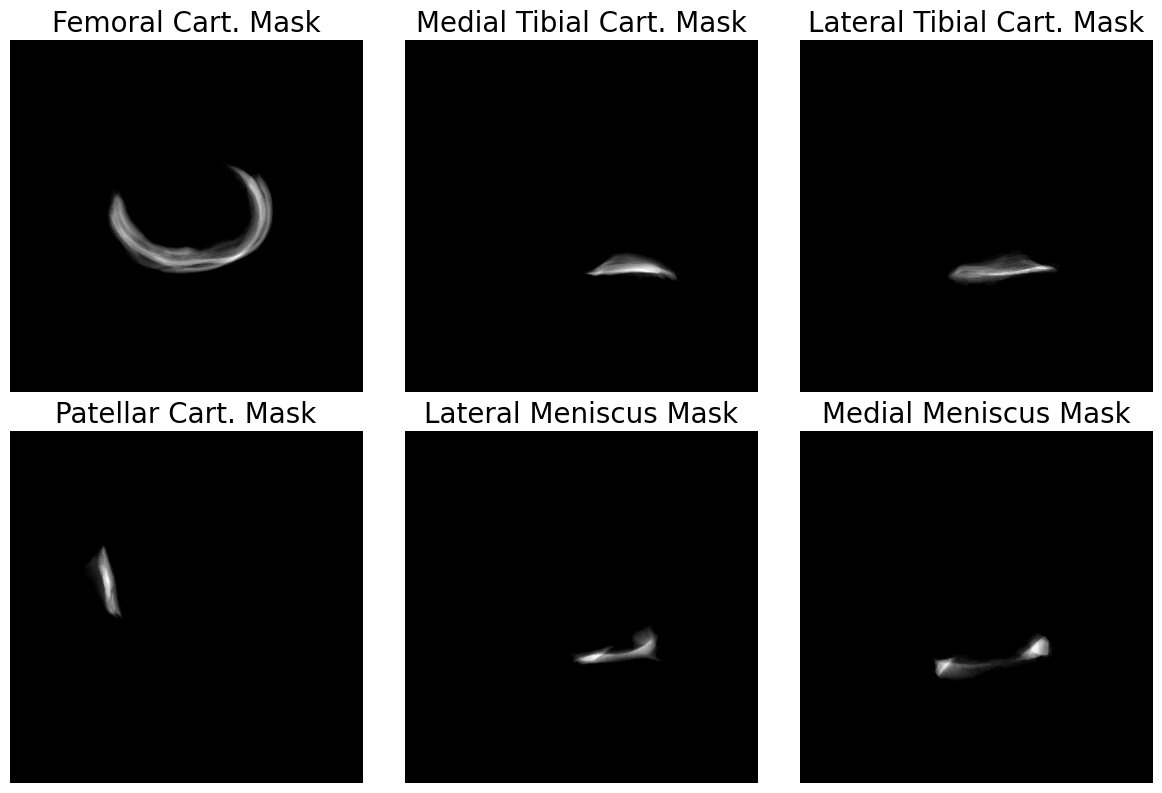

In [21]:
fig_captions = ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']

with h5py.File(fname_seg,'r') as hf:
    seg = np.array(hf['data'])

nrows = 2
ncols = 3
seg_sums = np.mean(seg, 2)
plt.subplots(nrows, ncols, figsize = (ncols*4, nrows*4))

for cnt, tis_num in enumerate(range(0,6)):
    plt.subplot(nrows, ncols, cnt+1)
    plt.imshow(seg_sums[...,tis_num], cmap = 'gray')
    plt.title('{} Mask'.format(fig_captions[cnt]), fontsize = 20)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Print out dimensions of dataset**

In [ ]:
print('Size of the image file is {}'.format(img.shape))
print('Size of the mask file is {}'.format(seg.shape))

Size of the image file is (384, 384, 160)
Size of the mask file is (384, 384, 160, 6)


In [ ]:
medial = seg[...,-1]
lateral = seg[...,-2]

In [ ]:
np.max(medial)

1

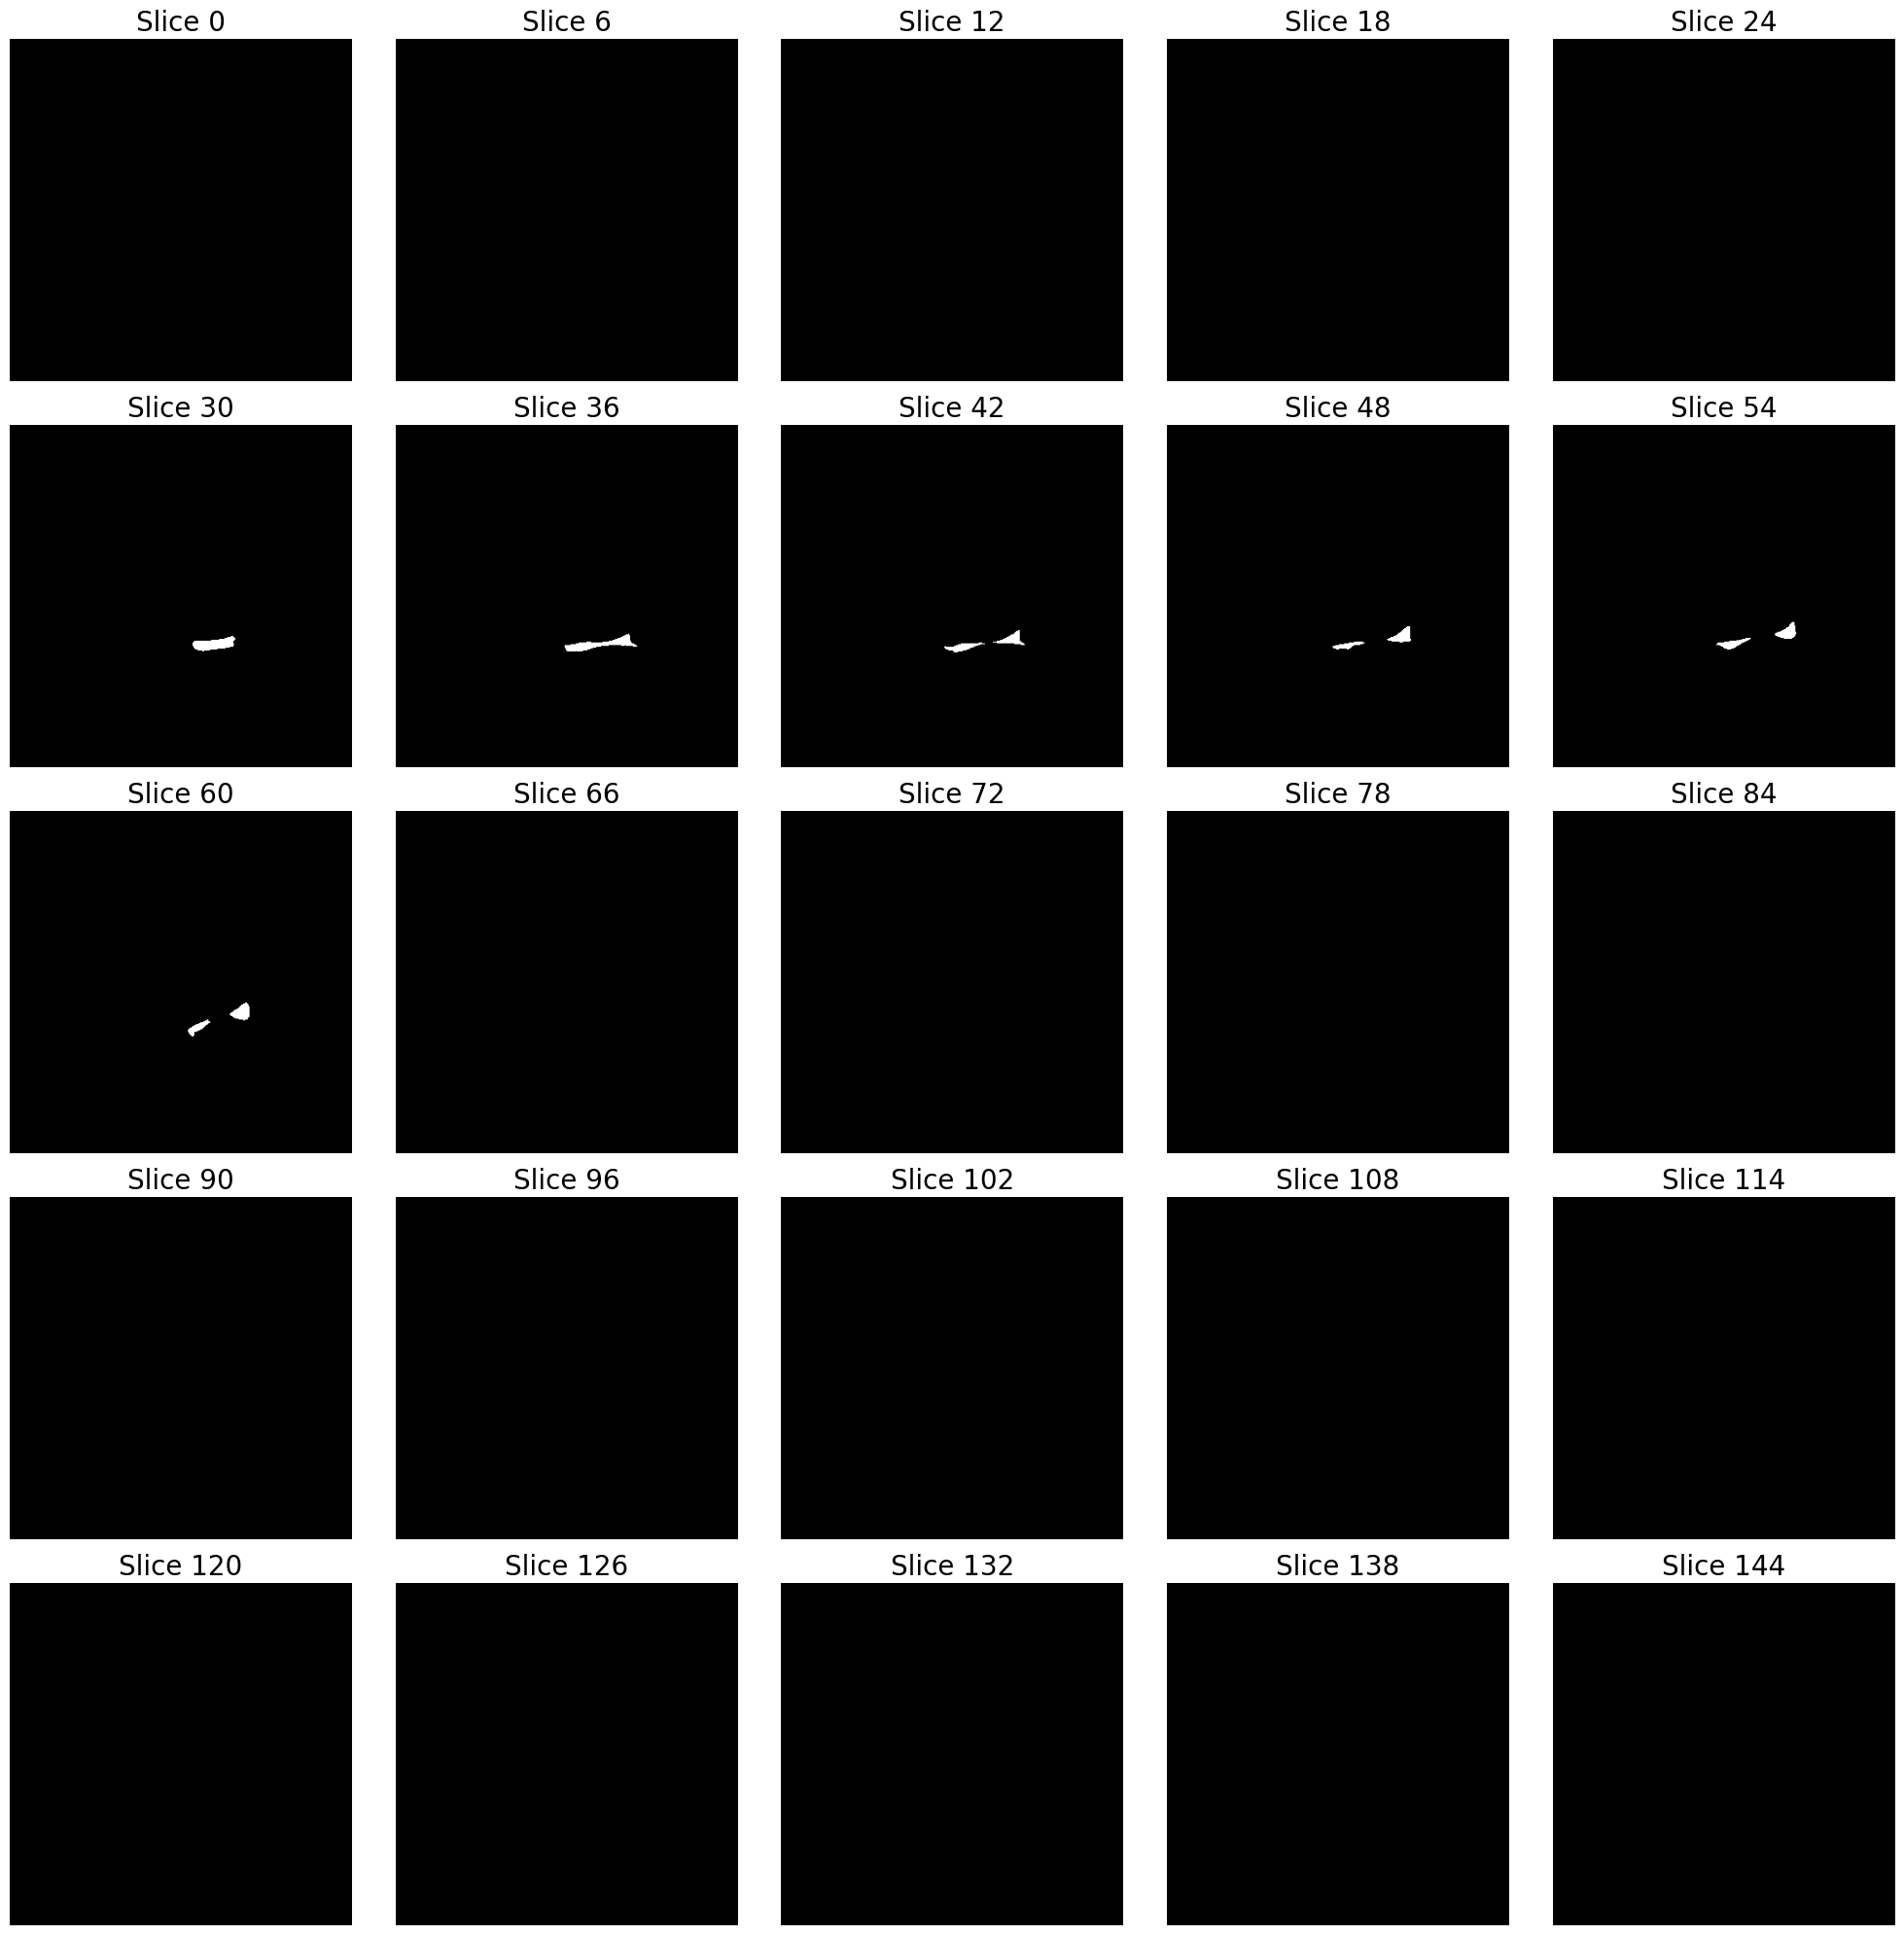

In [ ]:
num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,lateral.shape[-1],lateral.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(lateral[...,slnum], cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

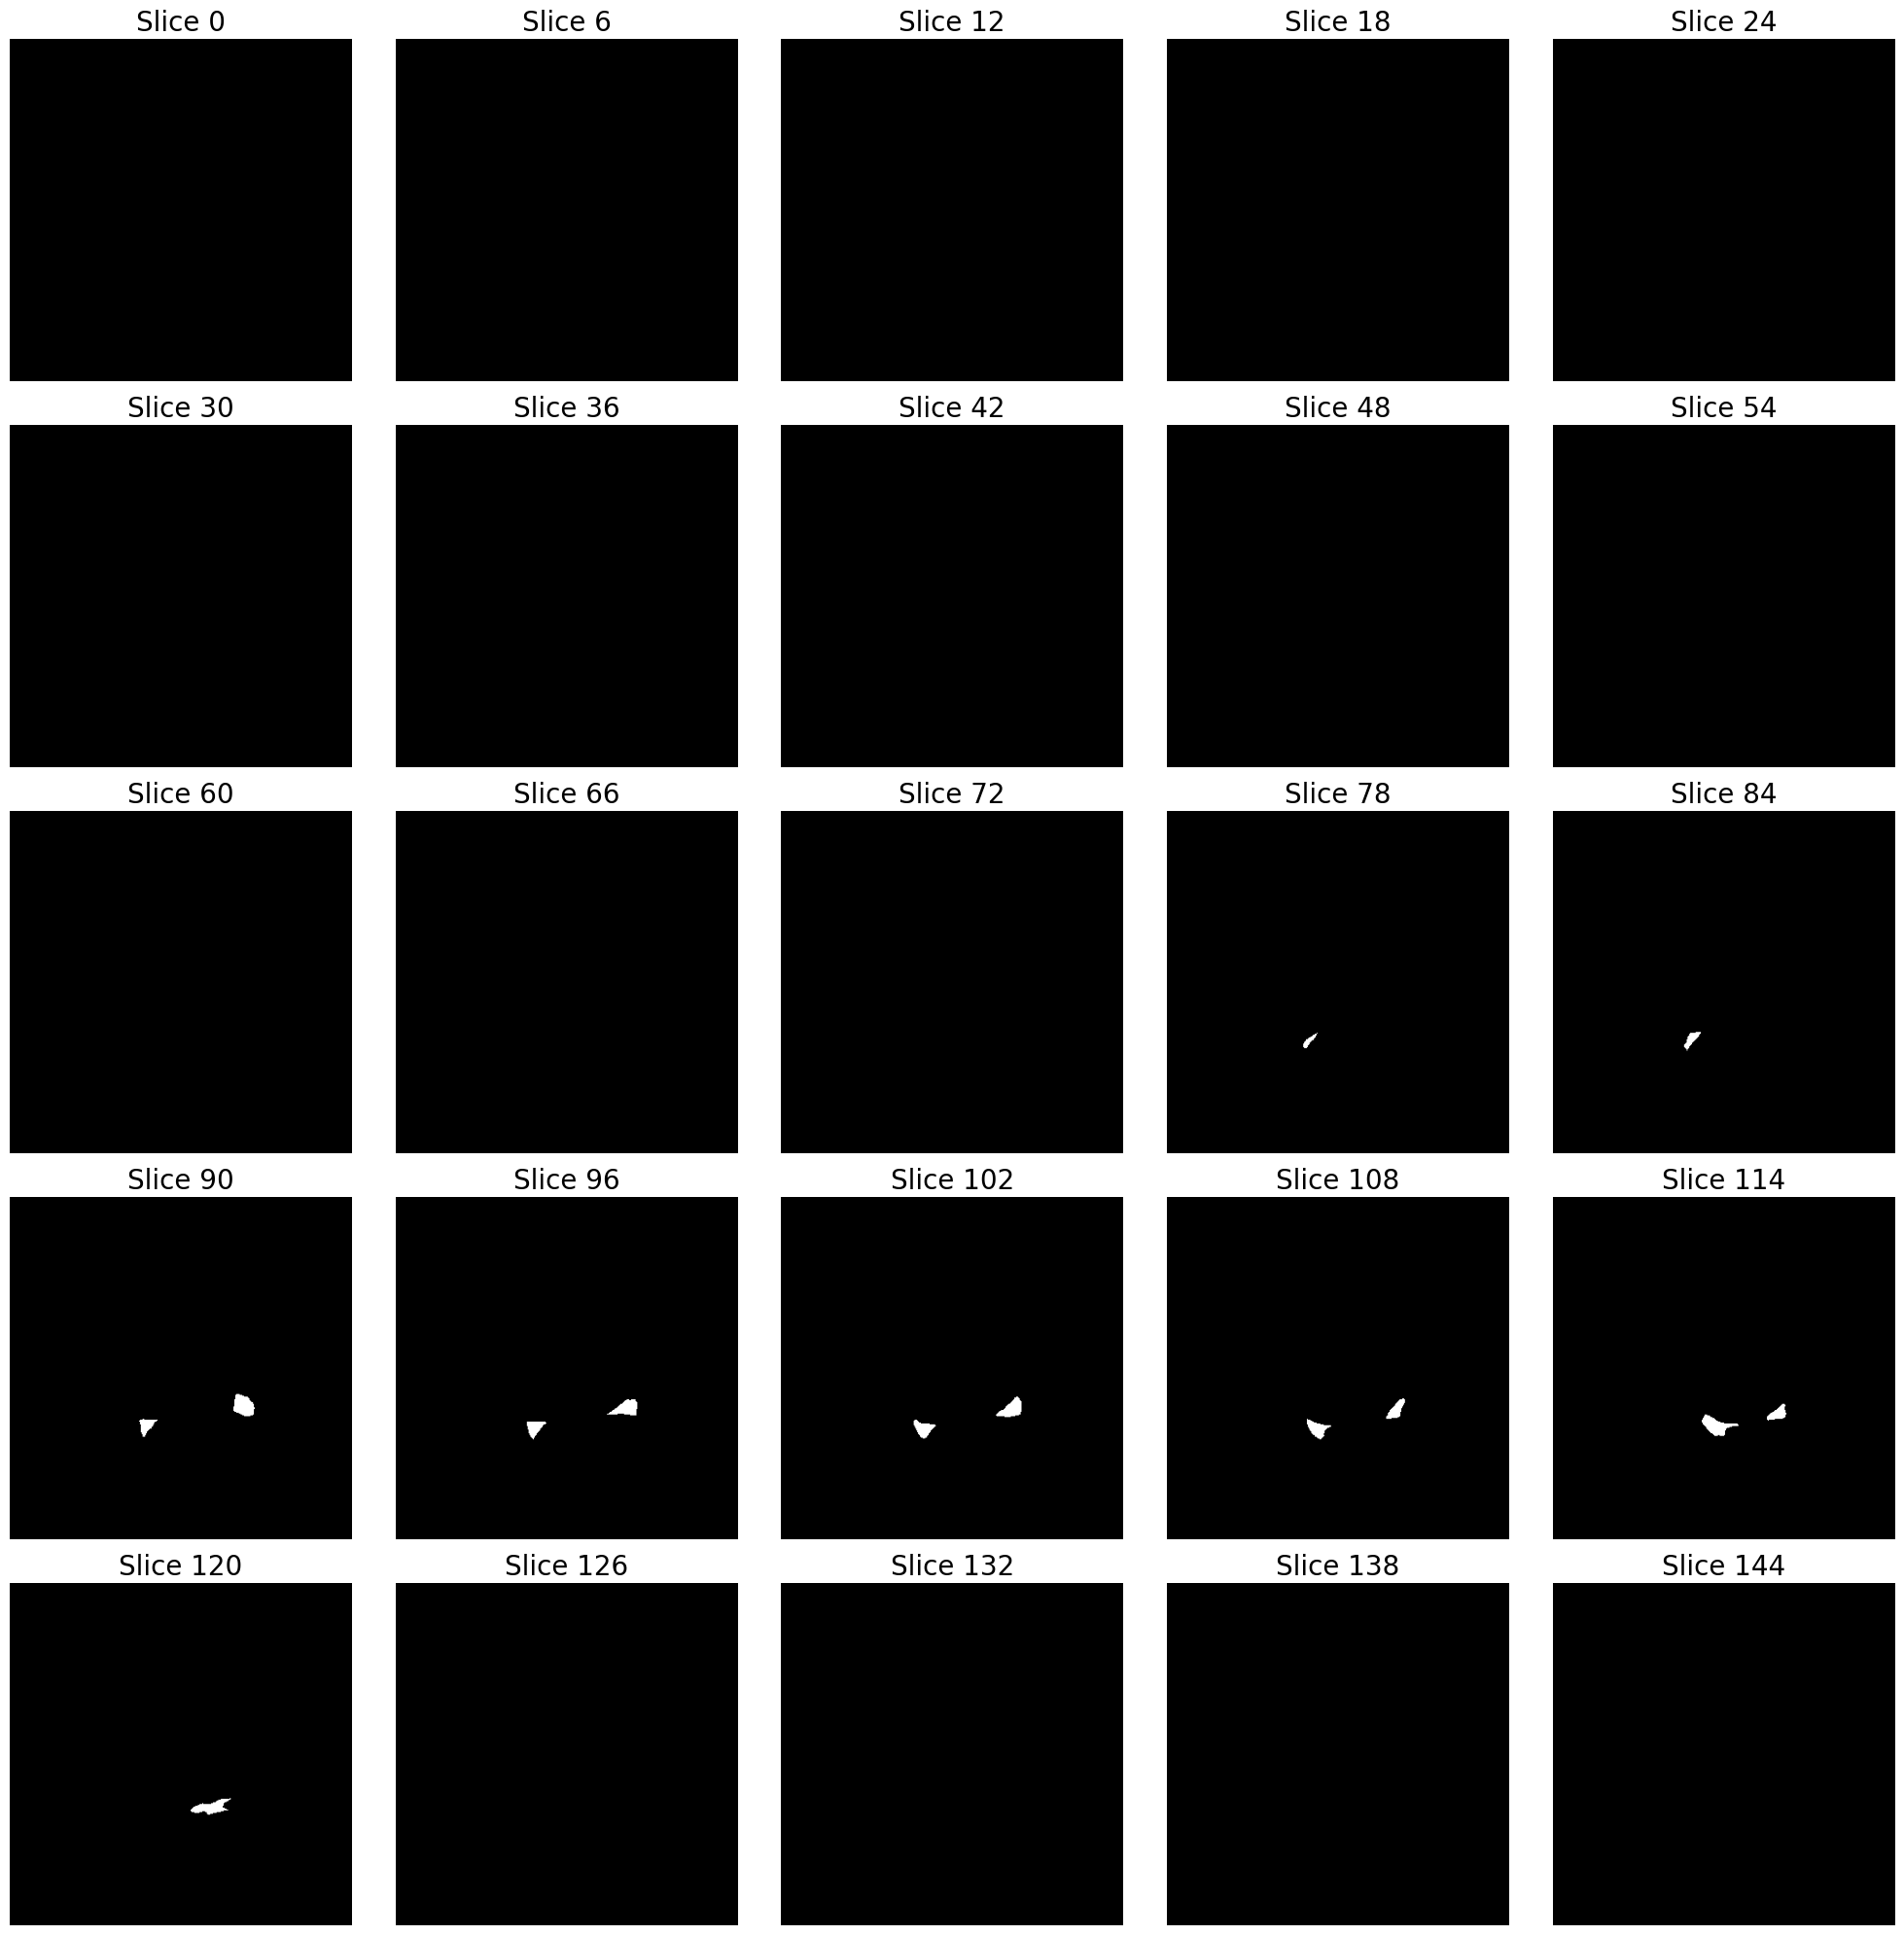

In [ ]:
num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,medial.shape[-1],medial.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(medial[...,slnum], cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# How much of the image does the meniscus span?

In [ ]:
def spans(mask):
    # Find the indices of non-zero elements in the binary mask
    nonzero_indices = np.nonzero(mask)

    # Calculate the minimum and maximum coordinates in each dimension
    min_coords = np.min(nonzero_indices, axis=1)
    max_coords = np.max(nonzero_indices, axis=1)

    return min_coords[0], max_coords[0], min_coords[1], max_coords[1], min_coords[2], max_coords[2]

In [ ]:
spans(lateral)

(211, 255, 179, 277, 27, 64)

In [ ]:
import glob
import os

# Loop through all train/val data and see variation in each span
DATA_DIR = 'Data'

# Get the paths
train_paths = np.array([i for i in glob.glob(f'{DATA_DIR}/train/*.seg')])
val_paths = np.array([i for i in glob.glob(f'{DATA_DIR}/valid/*.seg')])

print(train_paths.size)

all_paths = np.concatenate((train_paths, val_paths), axis=0)

120


In [ ]:
all_paths.size

148

In [ ]:
entries = []

for path in all_paths:
    entry = []
    entry.append(path)

    # load in file
    with h5py.File(path,'r') as hf:
        seg = np.array(hf['data'])

    # get masks
    medial = seg[...,-1]
    lateral = seg[...,-2]

    # Do the span function
    medspan = spans(medial)
    latspan = spans(lateral)

    # append to entry
    for i in latspan:
        entry.append(i)
    for i in medspan:
        entry.append(i)
    print(entry)

    entries.append(entry)

['Data/train/train_001_V00.seg', 202, 233, 151, 262, 78, 126, 211, 248, 137, 256, 21, 67]
['Data/train/train_001_V01.seg', 186, 226, 141, 252, 95, 140, 200, 235, 127, 242, 34, 79]
['Data/train/train_002_V00.seg', 148, 187, 163, 275, 81, 136, 153, 202, 121, 278, 17, 70]
['Data/train/train_002_V01.seg', 191, 234, 179, 290, 79, 138, 202, 250, 144, 298, 16, 69]
['Data/train/train_003_V00.seg', 215, 254, 154, 272, 19, 63, 225, 266, 135, 279, 92, 135]
['Data/train/train_003_V01.seg', 201, 244, 138, 255, 18, 65, 216, 260, 118, 263, 92, 136]
['Data/train/train_004_V00.seg', 208, 237, 146, 250, 24, 71, 183, 245, 110, 282, 93, 140]
['Data/train/train_004_V01.seg', 194, 221, 160, 265, 23, 74, 177, 233, 127, 295, 93, 140]
['Data/train/train_005_V00.seg', 218, 258, 158, 255, 27, 71, 226, 267, 125, 259, 92, 132]
['Data/train/train_005_V01.seg', 202, 241, 154, 248, 24, 74, 209, 256, 119, 251, 91, 133]
['Data/train/train_006_V00.seg', 212, 252, 147, 249, 17, 68, 225, 263, 107, 260, 84, 136]
['Data/tra

In [ ]:
import pandas as pd
df = pd.DataFrame(entries)

In [ ]:
import pandas as pd
df = pd.read_csv('maskspans.csv')

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,Data/train/train_001_V00.seg,202,233,151,262,78,126,211,248,137,256,21,67
1,1,Data/train/train_001_V01.seg,186,226,141,252,95,140,200,235,127,242,34,79
2,2,Data/train/train_002_V00.seg,148,187,163,275,81,136,153,202,121,278,17,70
3,3,Data/train/train_002_V01.seg,191,234,179,290,79,138,202,250,144,298,16,69
4,4,Data/train/train_003_V00.seg,215,254,154,272,19,63,225,266,135,279,92,135


In [ ]:
df.to_csv('maskspans.csv')

In [ ]:
!ls

colab_sam  Data  data_loader.ipynb  maskspans.csv  Unet  Untitled1.ipynb


(array([ 3.,  4.,  6., 18., 24., 32., 27., 18., 10.,  6.]),
 array([198. , 207.1, 216.2, 225.3, 234.4, 243.5, 252.6, 261.7, 270.8,
        279.9, 289. ]),
 <BarContainer object of 10 artists>)

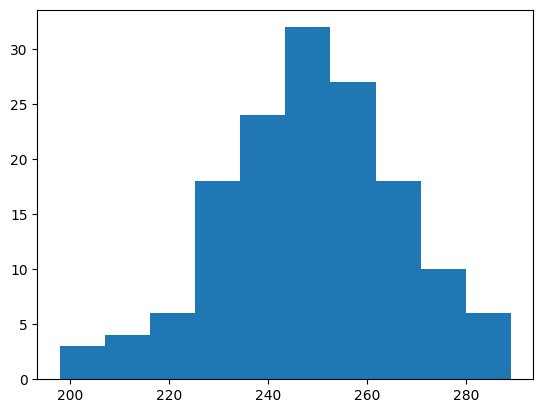

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['8'])

In [ ]:
df.agg([min, max])

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
min,0,Data/train/train_001_V00.seg,148,187,122,232,10,53,153,198,91,230,12,59
max,147,Data/valid/valid_014_V01.seg,246,284,193,293,105,148,253,289,222,304,104,147


In [ ]:
# total region all masks span
# dim1
dim1 = (min(min(df['1']), min(df['7'])), max(max(df['2']), max(df['8'])))
dim2 = (min(min(df['3']), min(df['9'])), max(max(df['4']), max(df['10'])))
dim3 = (min(min(df['5']), min(df['11'])), max(max(df['6']), max(df['12'])))

In [ ]:
dim1, dim2, dim3

((148, 289), (91, 304), (10, 148))

In [ ]:
dim1[1]-dim1[0]

141

In [ ]:
dim2[1]-dim2[0]

213

In [ ]:
dim3[1]-dim3[0]

138

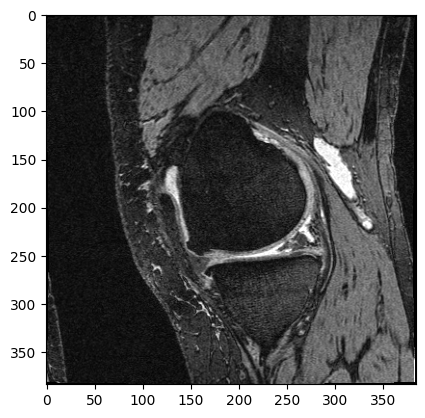

In [ ]:
# let's practice clipping, normalising and showing image
plt.imshow(img[...,100], vmin=0, vmax=0.005, cmap='gray')
plt.show()

In [ ]:
def crop_im(image):
    dim1_lower, dim1_upper = 120, 320
    dim2_lower, dim2_upper = 70, 326

    cropped = image[dim1_lower:dim1_upper, dim2_lower:dim2_upper, :]

    return cropped

In [ ]:
crop = crop_im(img)

In [ ]:
crop.shape

(200, 256, 160)

In [ ]:
def clip_and_norm(image, upper_bound):
    # Clip intensity values
    image = np.clip(image, 0, upper_bound)

    # Normalize the image to the range [0, 1]
    norm = (image - 0) / (upper_bound - 0)

    return norm

In [ ]:
norm_im = clip_and_norm(crop, 0.005)

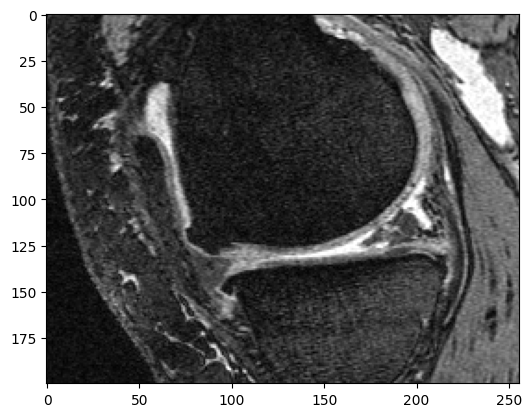

In [ ]:
plt.imshow(norm_im[...,100], cmap='gray')
plt.show()

In [ ]:
medial.shape
med_crop = crop_im(medial)

In [ ]:
lateral.shape
lat_crop = crop_im(lateral)

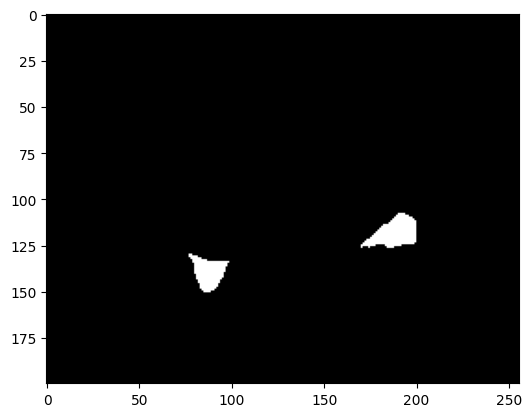

In [ ]:
plt.imshow(med_crop[...,100], cmap='gray')
plt.show()